In [12]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data_path = '../../datasets/chest-segmentation/'
data_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
data_df.shape

(16708, 2)

In [14]:
data_df.head()

,ImageId,MaskId
0,ID00007637202177411956430_0.jpg,ID00007637202177411956430_mask_0.jpg
1,ID00007637202177411956430_1.jpg,ID00007637202177411956430_mask_1.jpg
2,ID00007637202177411956430_2.jpg,ID00007637202177411956430_mask_2.jpg
3,ID00007637202177411956430_3.jpg,ID00007637202177411956430_mask_3.jpg
4,ID00007637202177411956430_4.jpg,ID00007637202177411956430_mask_4.jpg


In [15]:
def extract_client_id(x):
    return x.split('_')[0]
data_df['Id'] = data_df['ImageId'].apply(extract_client_id)
data_df

,ImageId,MaskId,Id
0,ID00007637202177411956430_0.jpg,ID00007637202177411956430_mask_0.jpg,ID00007637202177411956430
1,ID00007637202177411956430_1.jpg,ID00007637202177411956430_mask_1.jpg,ID00007637202177411956430
2,ID00007637202177411956430_2.jpg,ID00007637202177411956430_mask_2.jpg,ID00007637202177411956430
3,ID00007637202177411956430_3.jpg,ID00007637202177411956430_mask_3.jpg,ID00007637202177411956430
4,ID00007637202177411956430_4.jpg,ID00007637202177411956430_mask_4.jpg,ID00007637202177411956430
...,...,...,...
16703,ID00426637202313170790466_403.jpg,ID00426637202313170790466_mask_403.jpg,ID00426637202313170790466
16704,ID00426637202313170790466_404.jpg,ID00426637202313170790466_mask_404.jpg,ID00426637202313170790466
16705,ID00426637202313170790466_405.jpg,ID00426637202313170790466_mask_405.jpg,ID00426637202313170790466
16706,ID00426637202313170790466_406.jpg,ID00426637202313170790466_mask_406.jpg,ID00426637202313170790466


In [23]:
client_ids = data_df['Id'].unique().tolist()
len(client_ids)

112

In [16]:
import cv2

In [28]:
index = 0
client_data = data_df.loc[data_df['Id']==client_ids[index], ['ImageId', 'MaskId']] # index 번째 image 목록
len(client_data)

30

../../datasets/chest-segmentation/images\ID00007637202177411956430_2.jpg


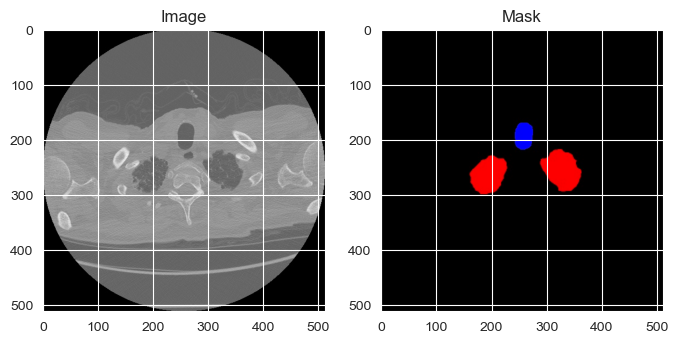

In [33]:
sub_index = 2
img_name, mask_name = client_data.iloc[sub_index].values
img_path = os.path.join(data_path, 'images', img_name)
mask_path = os.path.join(data_path, 'masks', mask_name)
print(img_path)

image = cv2.imread(img_path)
mask = cv2.imread(mask_path)

plt.figure(figsize=(8,6))
plt.subplot(121)
plt.title('Image')
plt.imshow(image)

plt.subplot(122)
plt.title('Mask')
plt.imshow(mask)

In [34]:
mask.shape

(512, 512, 3)

In [35]:
image.shape

(512, 512, 3)

In [38]:
encode_info = np.array([1,2,3])
train_size=9
np.tile(encode_info, (train_size,1))

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [40]:
brand_window = [10,11,12,13,14,15,16,17,18]
sales_window = [20,21,22,23,24,25,26,27,28]

In [42]:
np.column_stack((np.tile(encode_info, (train_size,1)), brand_window, sales_window))

array([[ 1,  2,  3, 10, 20],
       [ 1,  2,  3, 11, 21],
       [ 1,  2,  3, 12, 22],
       [ 1,  2,  3, 13, 23],
       [ 1,  2,  3, 14, 24],
       [ 1,  2,  3, 15, 25],
       [ 1,  2,  3, 16, 26],
       [ 1,  2,  3, 17, 27],
       [ 1,  2,  3, 18, 28]])